# Data Description

## Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

## About this dataset
The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. For the outcome class value 1 is interpreted as "tested positive for diabetes".

|Column Name| Description|
|:------------|:------------|
|Pregnancies|Number of times pregnant|
|Glucose|Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
|BloodPressure|Diastolic blood pressure (mm Hg)|
|SkinThickness|Triceps skin fold thickness (mm)|
|Insulin|2-Hour serum insulin (mu U/ml)|
|BMI|Body mass index (weight in kg/(height in m)^2)|
|DiabetesPedigreeFunction| Diabetes pedigree function|
|Age| Age (years)|
|Outcome|Class variable (0 or 1) |

In [3]:
# Import of relevant packages
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score

from sklearn.linear_model import LogisticRegression

In [4]:
# Loading the titanic dataset
diabetes = pd.read_csv('data/diabetes.csv')

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.shape

(768, 9)

In [6]:
# Having a look at some simple, descriptive statistics 
diabetes.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [7]:
#Checking missing values
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# Checking for missing values
missing = pd.DataFrame(diabetes.isnull().sum(), columns=["Amount"])
missing['Percentage'] = round((missing['Amount']/diabetes.shape[0])*100, 2)
missing[missing['Amount'] != 0]

,Amount,Percentage


In [9]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import time
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans

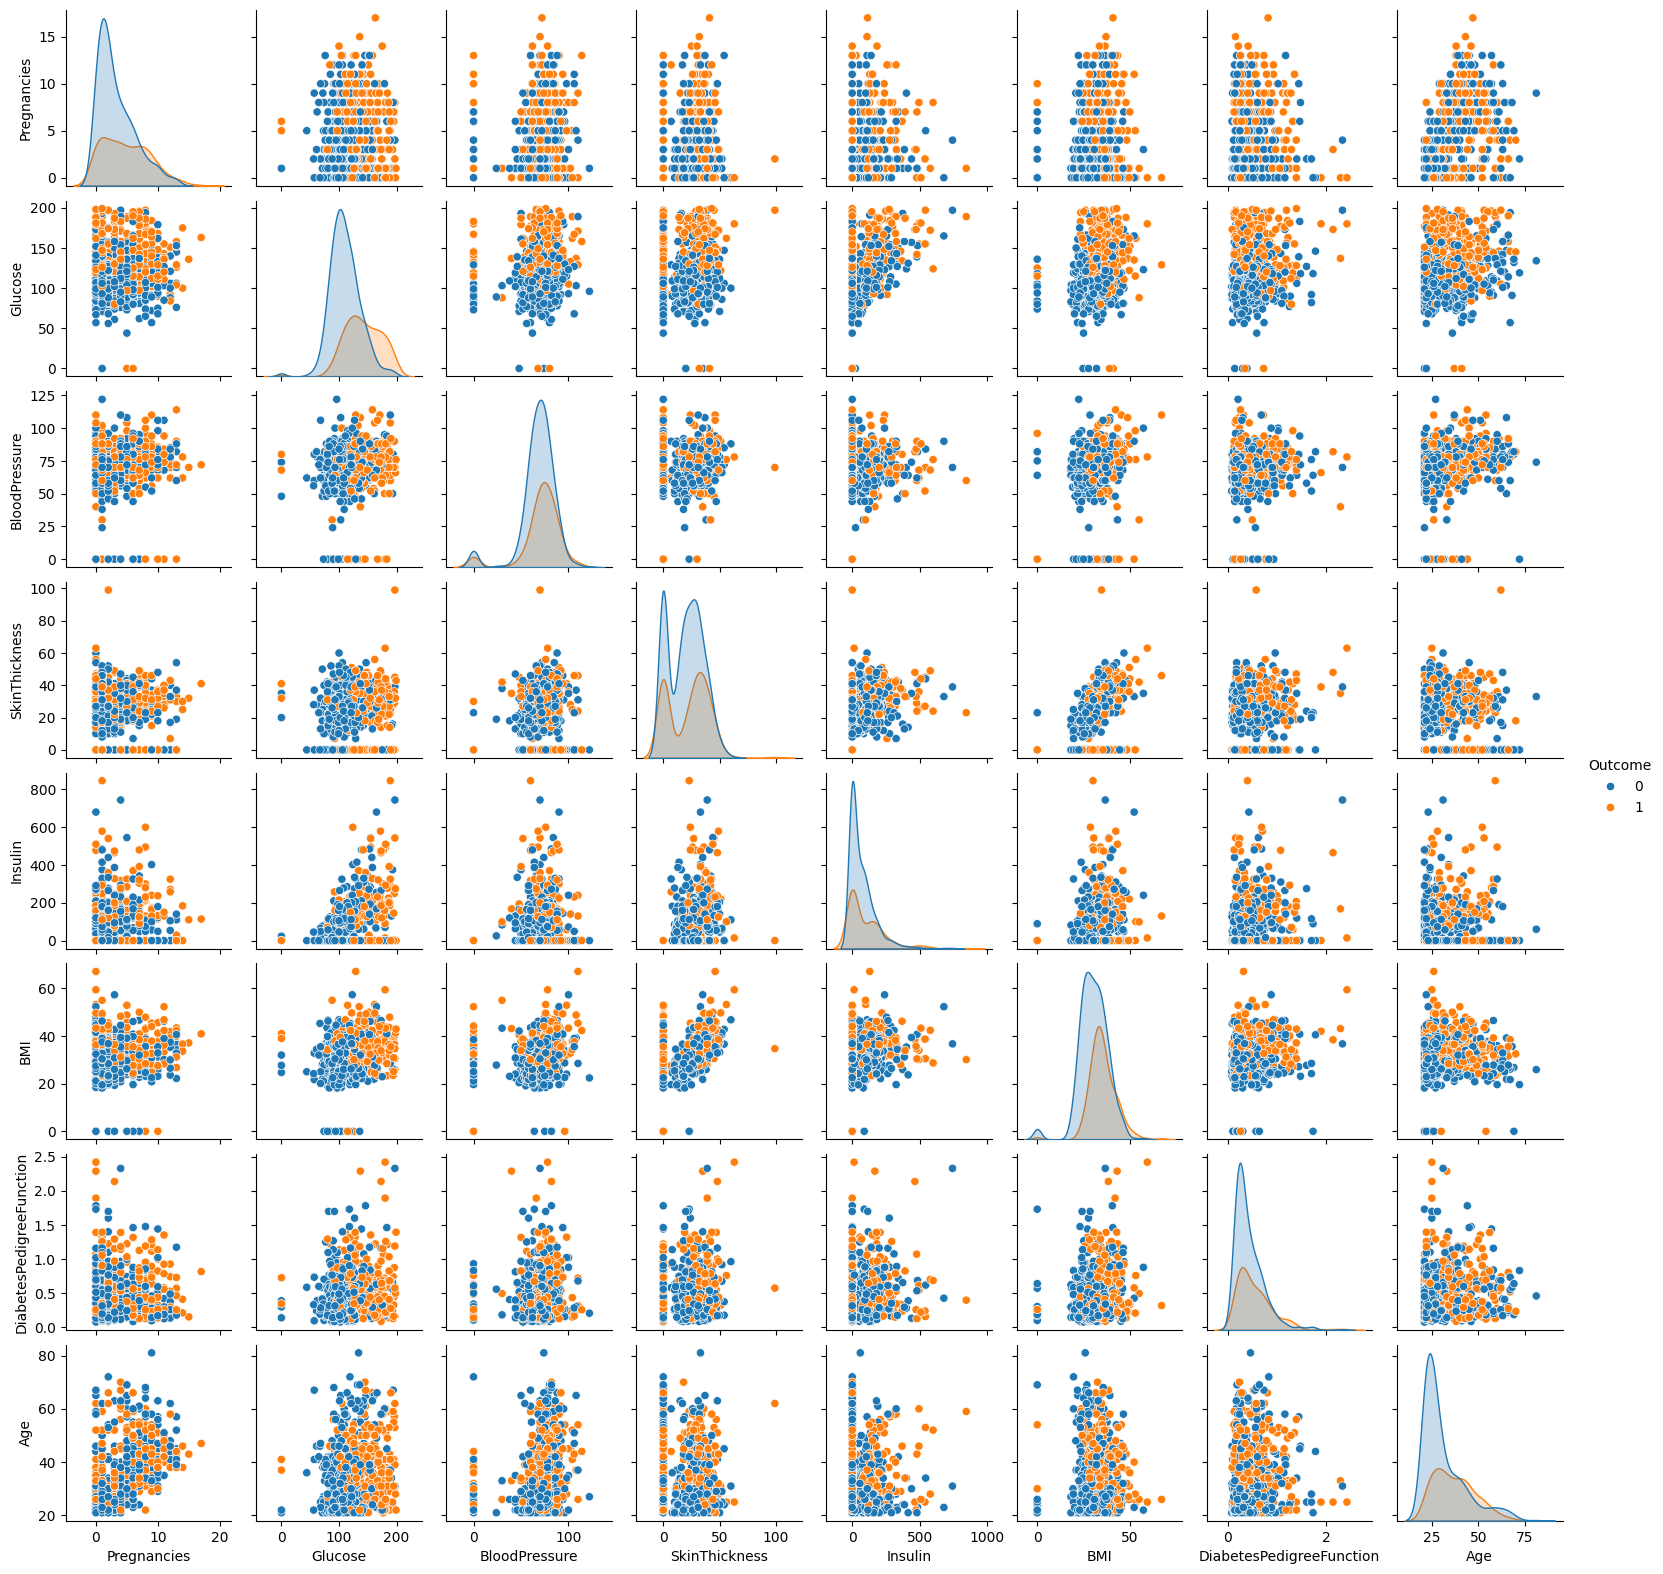

In [10]:
sns.pairplot(diabetes, hue="Outcome", height=2); #the distribution helps to know if it's easy to separate the data or not


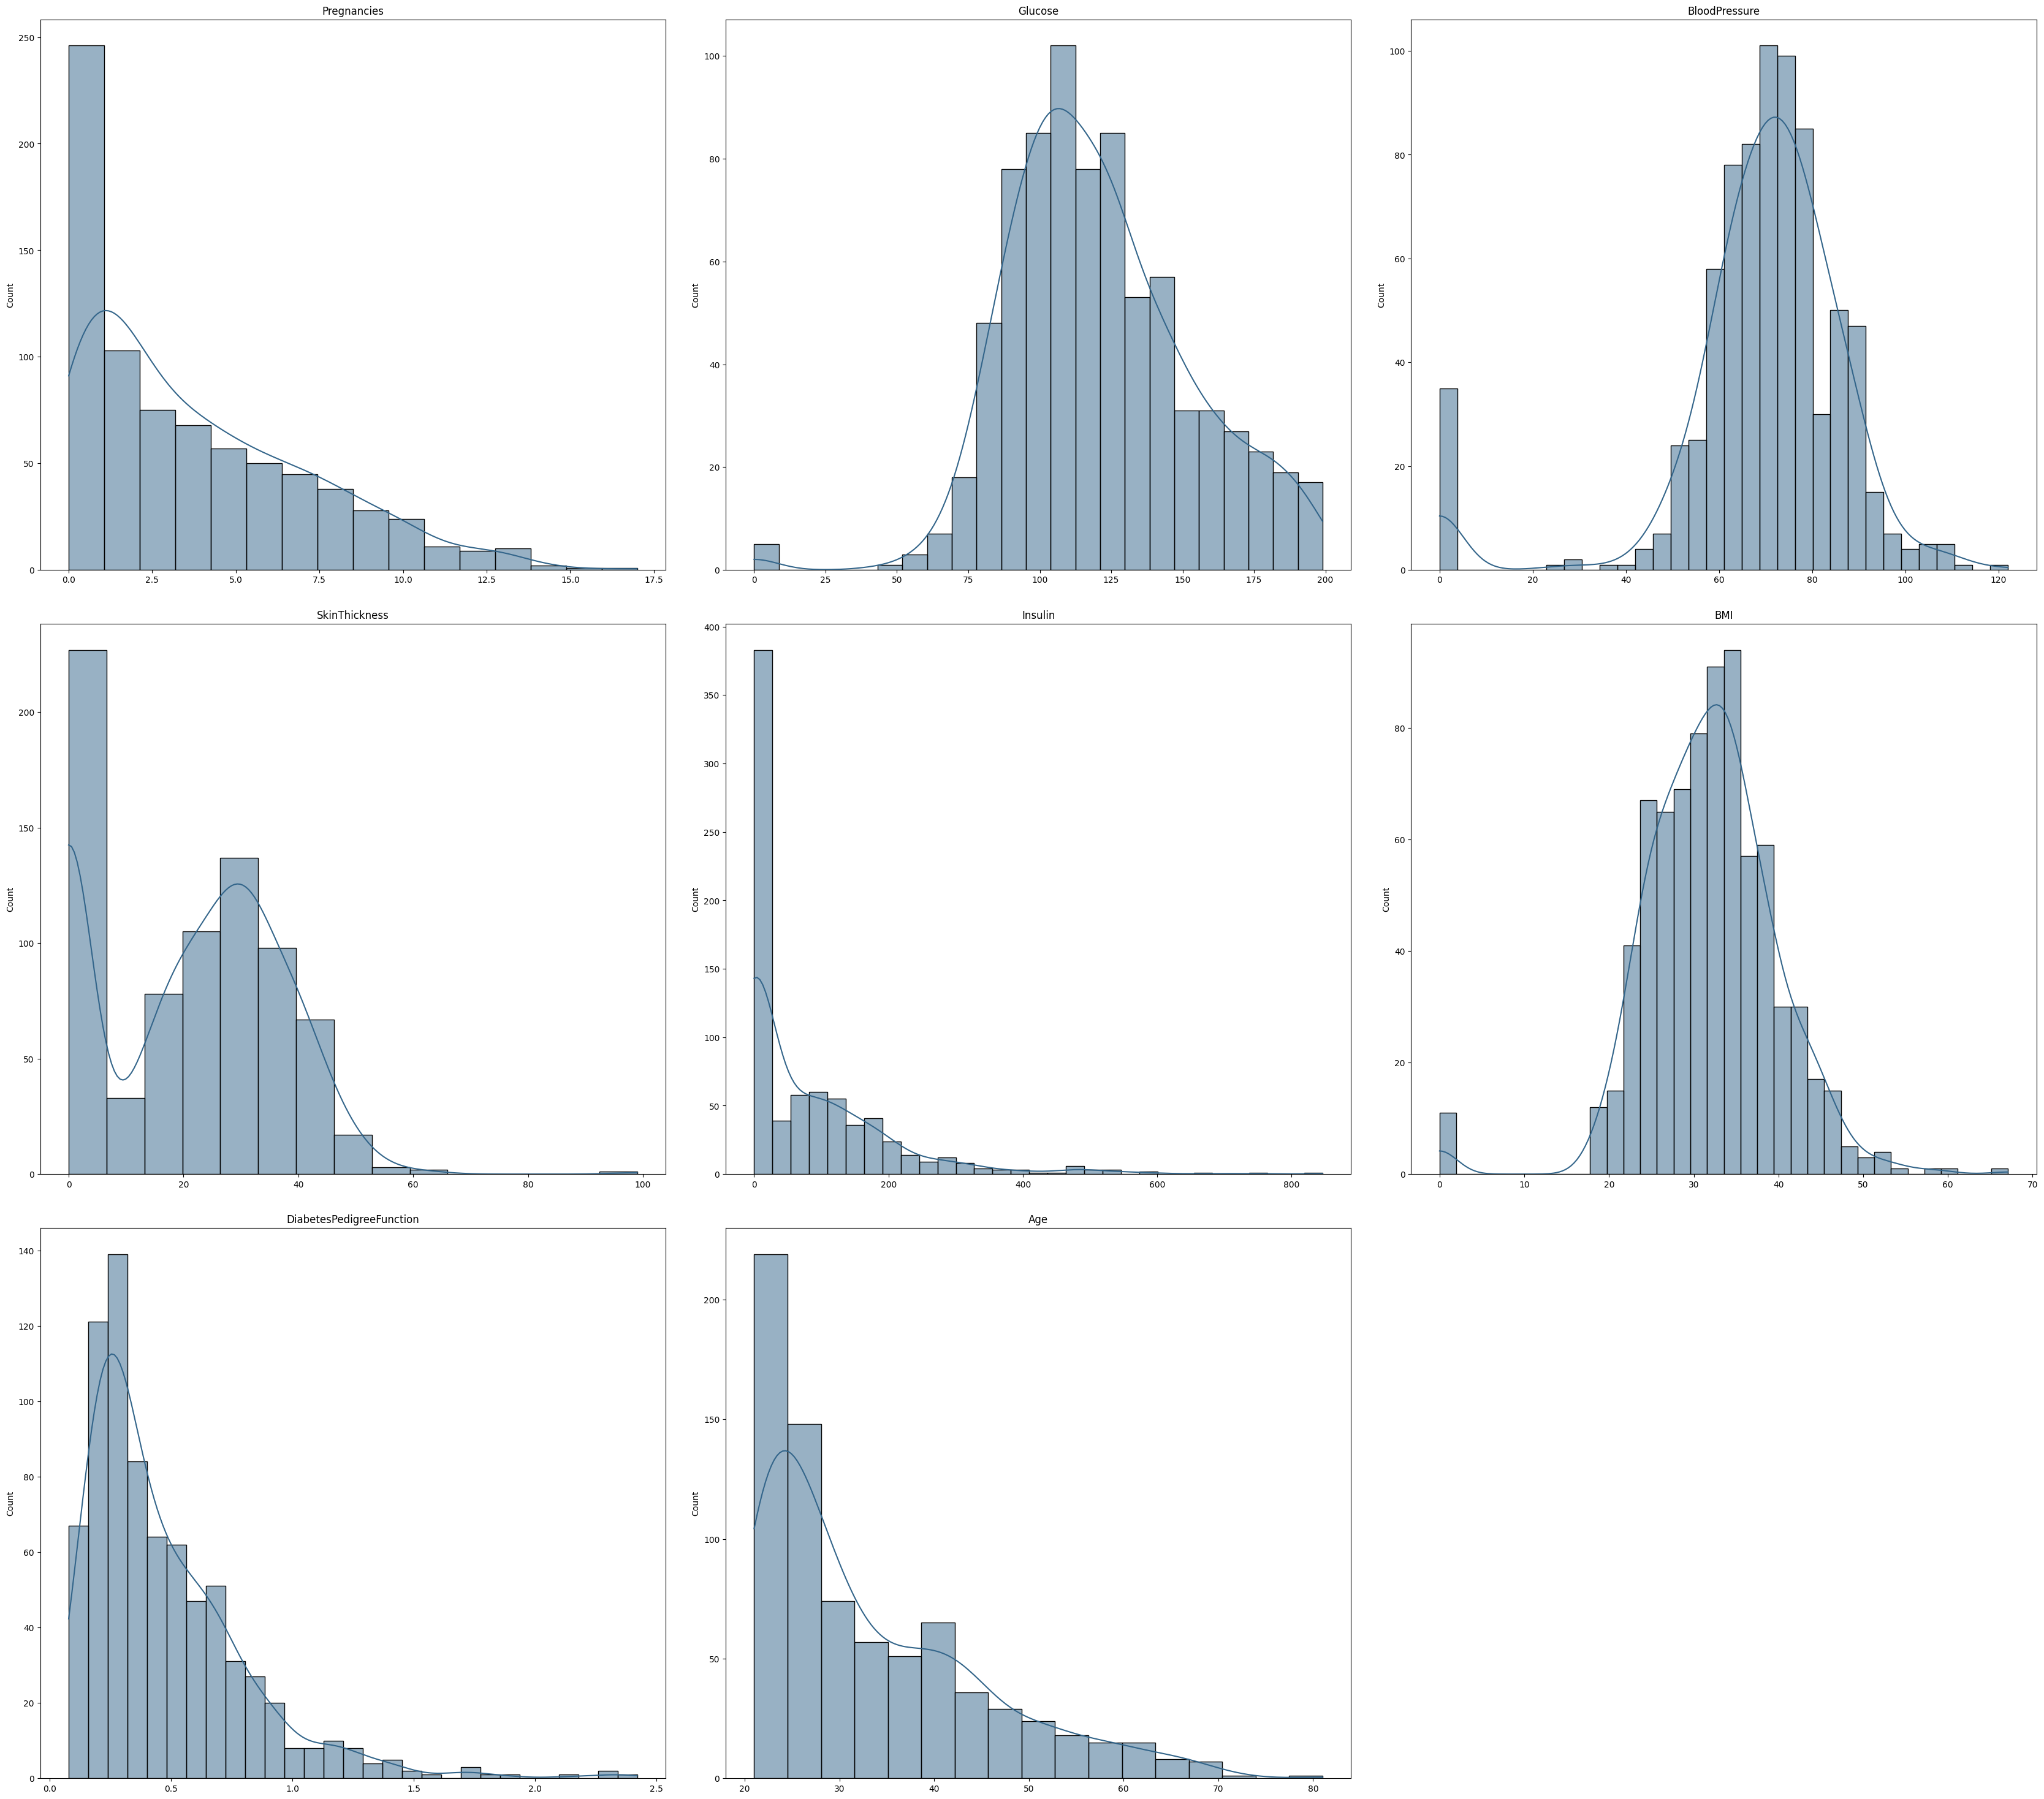

In [12]:
# Plot distribution of features 
features = diabetes.columns.tolist()
fig,ax = plt.subplots(3,3,figsize=(34,30))
count = 0
for item in features:
    sns.histplot(diabetes[item], kde=True, ax=ax[int(count/3)][count%3], color='#33658A').set(title=item, xlabel='')
    count += 1
ax.flat[-1].set_visible(False)
fig.tight_layout(pad=3)

In [13]:
#Checking Outliers
diabetes.describe(percentiles = [0.01,0.02,0.03,0.04,0.05,0.1,0.25,0.50,0.75,0.9,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,0.00000,0.00000,0.000,0.00000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,11.00000,11.00000,12.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,57.00000,69.02000,73.01000,76.000,79.00000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,184.00000,187.99000,192.32000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,0.00000,0.00000,0.00000,0.000,38.70000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,92.00000,94.99000,99.32000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.00000,0.00000,0.000,0.00000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,45.32000,46.00000,48.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.00000,0.00000,0.000,0.00000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,325.00000,369.90000,470.94000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,0.00000,19.16800,19.90100,21.000,21.80000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,45.33200,46.10000,47.52600,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.09468,0.11902,0.12701,0.134,0.14035,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.18424,1.25793,1.39066,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,21.00000,21.00000,21.000,21.00000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,60.00000,62.00000,64.66000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.00000,0.000,0.00000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00


In [14]:
#Treating Outliers
diabetes['Pregnancies'] = np.where(diabetes['Pregnancies'] > 10.00 , 10.00, diabetes['Pregnancies'])
diabetes['BloodPressure'] = np.where(diabetes['BloodPressure'] < 44.00 , 44.00, diabetes['BloodPressure'])
diabetes['BloodPressure'] = np.where(diabetes['BloodPressure'] > 106.00 , 106.00, diabetes['BloodPressure'])
diabetes['SkinThickness'] = np.where(diabetes['SkinThickness'] > 51.33 , 51.33, diabetes['SkinThickness'])
diabetes['Insulin'] = np.where(diabetes['Insulin'] > 519.90 , 519.90, diabetes['Insulin'])
diabetes['DiabetesPedigreeFunction'] = np.where(diabetes['DiabetesPedigreeFunction'] > 1.00 , 1.00, diabetes['DiabetesPedigreeFunction'])
diabetes['Age'] = np.where(diabetes['Age'] > 67.00 , 67.00, diabetes['Age'])

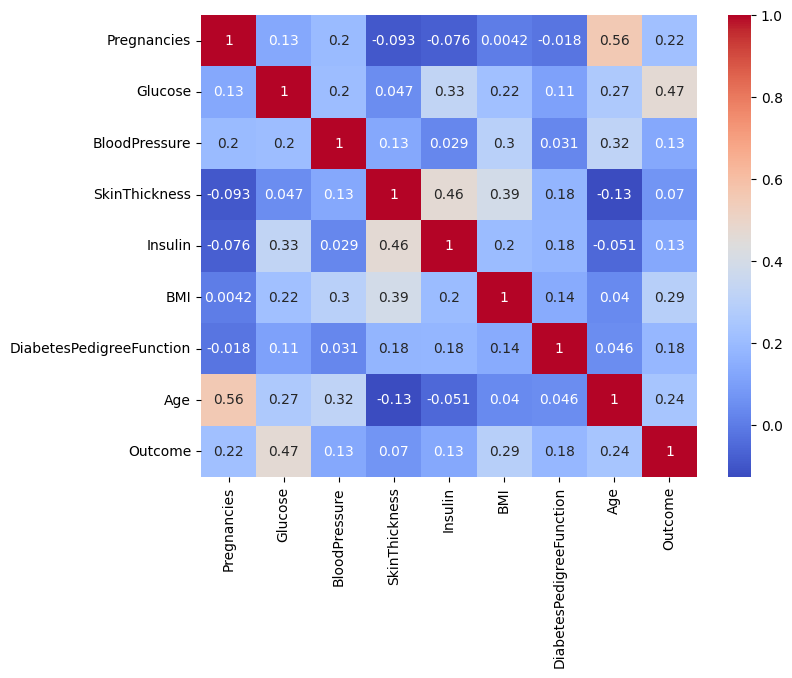

In [15]:
#Checking Correlation
corrdata = diabetes.corr()
plt.figure(figsize = [8,6])
sns.heatmap(corrdata, annot = True, cmap = 'coolwarm')
plt.show()

In [16]:
y = diabetes['Outcome']
x = diabetes.drop(['Outcome'], axis = 1)

In [17]:
#split data now and to have the same data for Decision tree and logistic regression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.33, random_state= 42)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [19]:
drt = DecisionTreeClassifier()
drt.fit(x_train, y_train)

print(f'Training score : {drt.score(x_train, y_train)}')
print(f'Testing score : {drt.score(x_test, y_test)}')

Training score : 1.0
Testing score : 0.7047244094488189


In [20]:
from sklearn.model_selection import GridSearchCV
params= {"criterion": ["gini", "entropy"],
       "max_depth": [6,8,10,12,15],
       "min_samples_split":[10,50,100,150,200],
       "min_samples_leaf":[5,10,20,50]}

dt_cv= DecisionTreeClassifier()
Gsearch_dt= GridSearchCV(estimator= dt_cv,param_grid= params, cv=10, n_jobs=-1, verbose= 1,scoring= "accuracy")

Gsearch_dt.fit(x_train, y_train)


Fitting 10 folds for each of 200 candidates, totalling 2000 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10, 12, 15],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'min_samples_split': [10, 50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [21]:
Gsearch_dt.best_score_

0.7762443438914028

In [22]:
Gsearch_dt.best_params_


{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 50}

In [23]:
from sklearn.model_selection import GridSearchCV
params= {"criterion": ["entropy"],
       "max_depth": [6,8,10,12,15],
       "min_samples_split":[10,50,100,150,200],
       "min_samples_leaf":[5,10,20,50]}

dt_cv= DecisionTreeClassifier()
Gsearch_dt= GridSearchCV(estimator= dt_cv,param_grid= params, cv=10, n_jobs=-1, verbose= 1,scoring= "accuracy")

Gsearch_dt.fit(x_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [6, 8, 10, 12, 15],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'min_samples_split': [10, 50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [24]:
Gsearch_dt.best_score_

0.7646681749622927

In [25]:
Gsearch_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 20,
 'min_samples_split': 50}

In [26]:
drt1 = DecisionTreeClassifier(criterion= 'gini', max_depth= 6, min_samples_leaf= 10, min_samples_split= 50)
drt2 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 6, min_samples_leaf= 20, min_samples_split= 50)

drt1.fit(x_train, y_train)
drt2.fit(x_train, y_train)

print(f'Training score for model 1: {drt1.score(x_train, y_train)}')
print(f'Testing score for model 1: {drt1.score(x_test, y_test)}')

print(f'Training score for model 2: {drt2.score(x_train, y_train)}')
print(f'Testing score for model 2: {drt2.score(x_test, y_test)}')

Training score for model 1: 0.8171206225680934
Testing score for model 1: 0.7244094488188977
Training score for model 2: 0.8151750972762646
Testing score for model 2: 0.7283464566929134


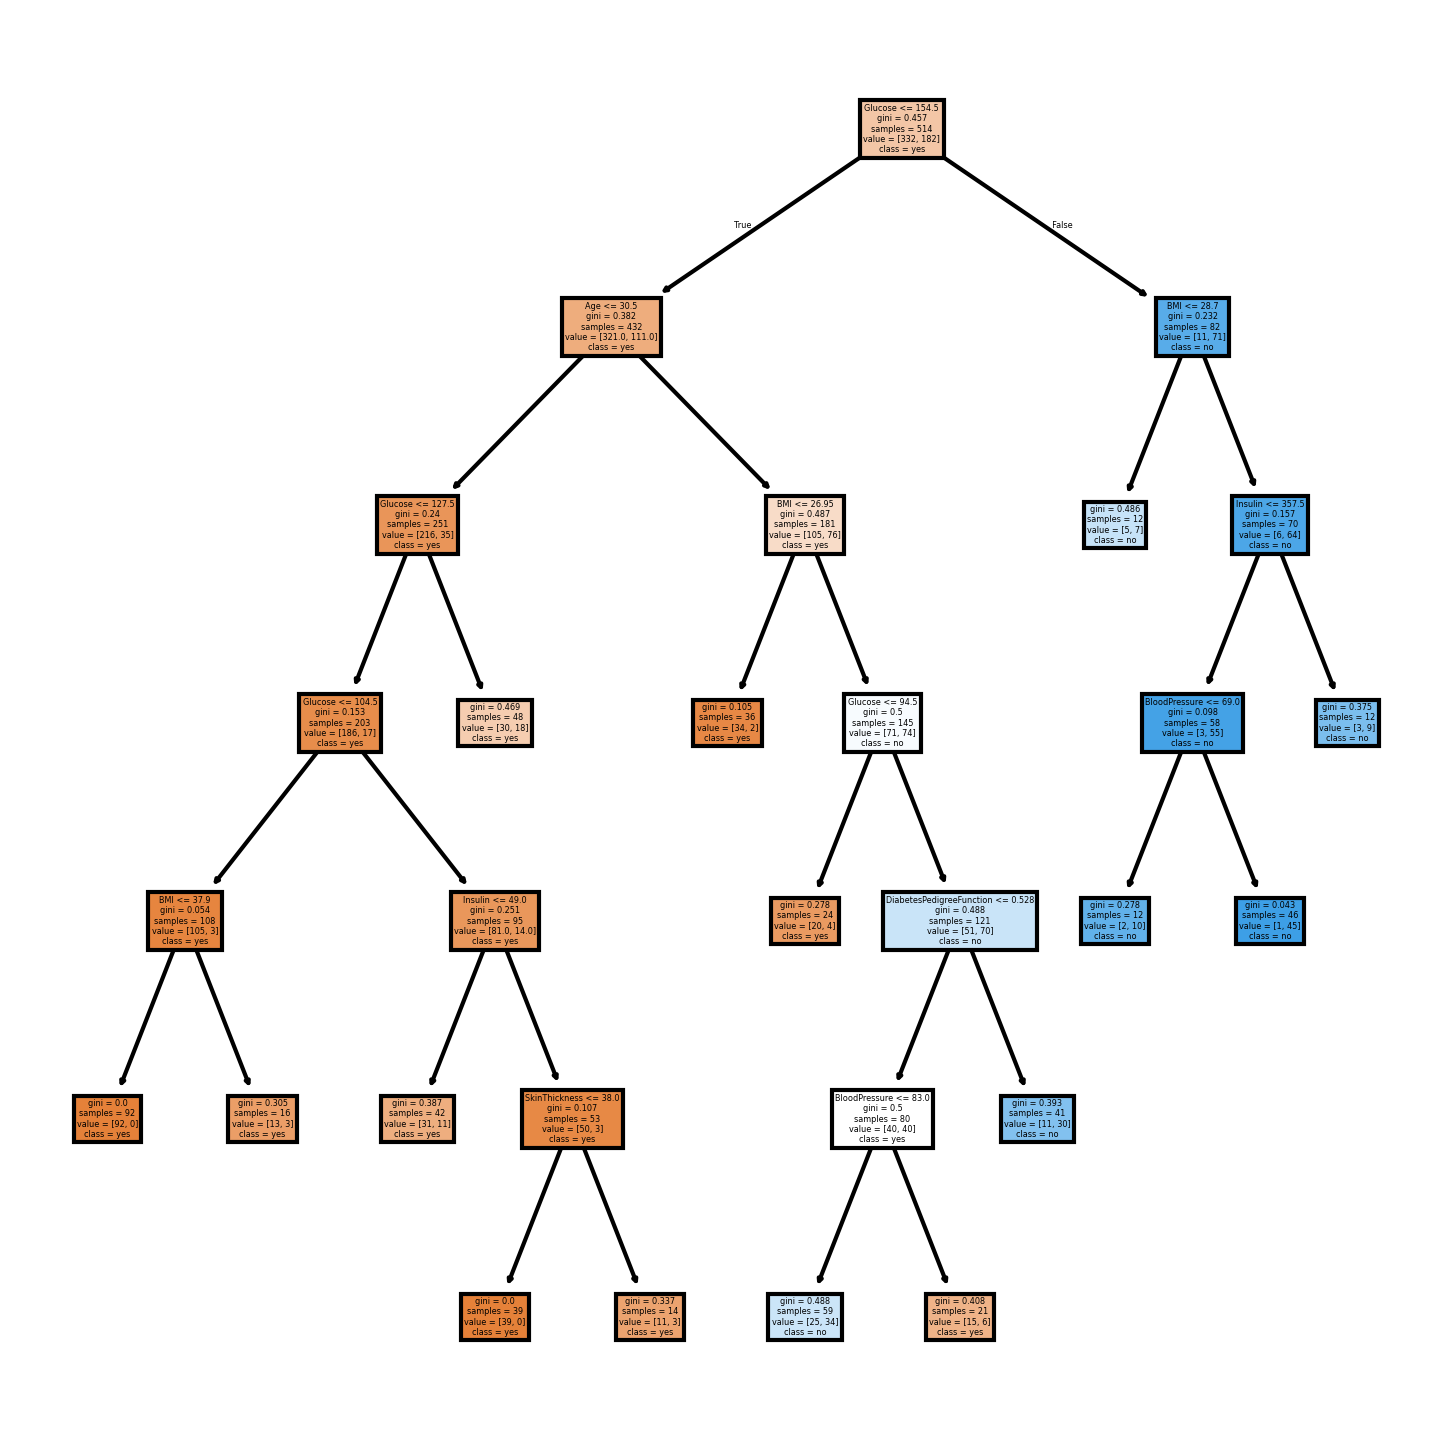

In [27]:
from sklearn.tree import plot_tree

fn=x_train.columns

cn=["yes","no"] 

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)

plot_tree(drt1,
          feature_names = fn, 
           class_names=cn,
           filled = True);

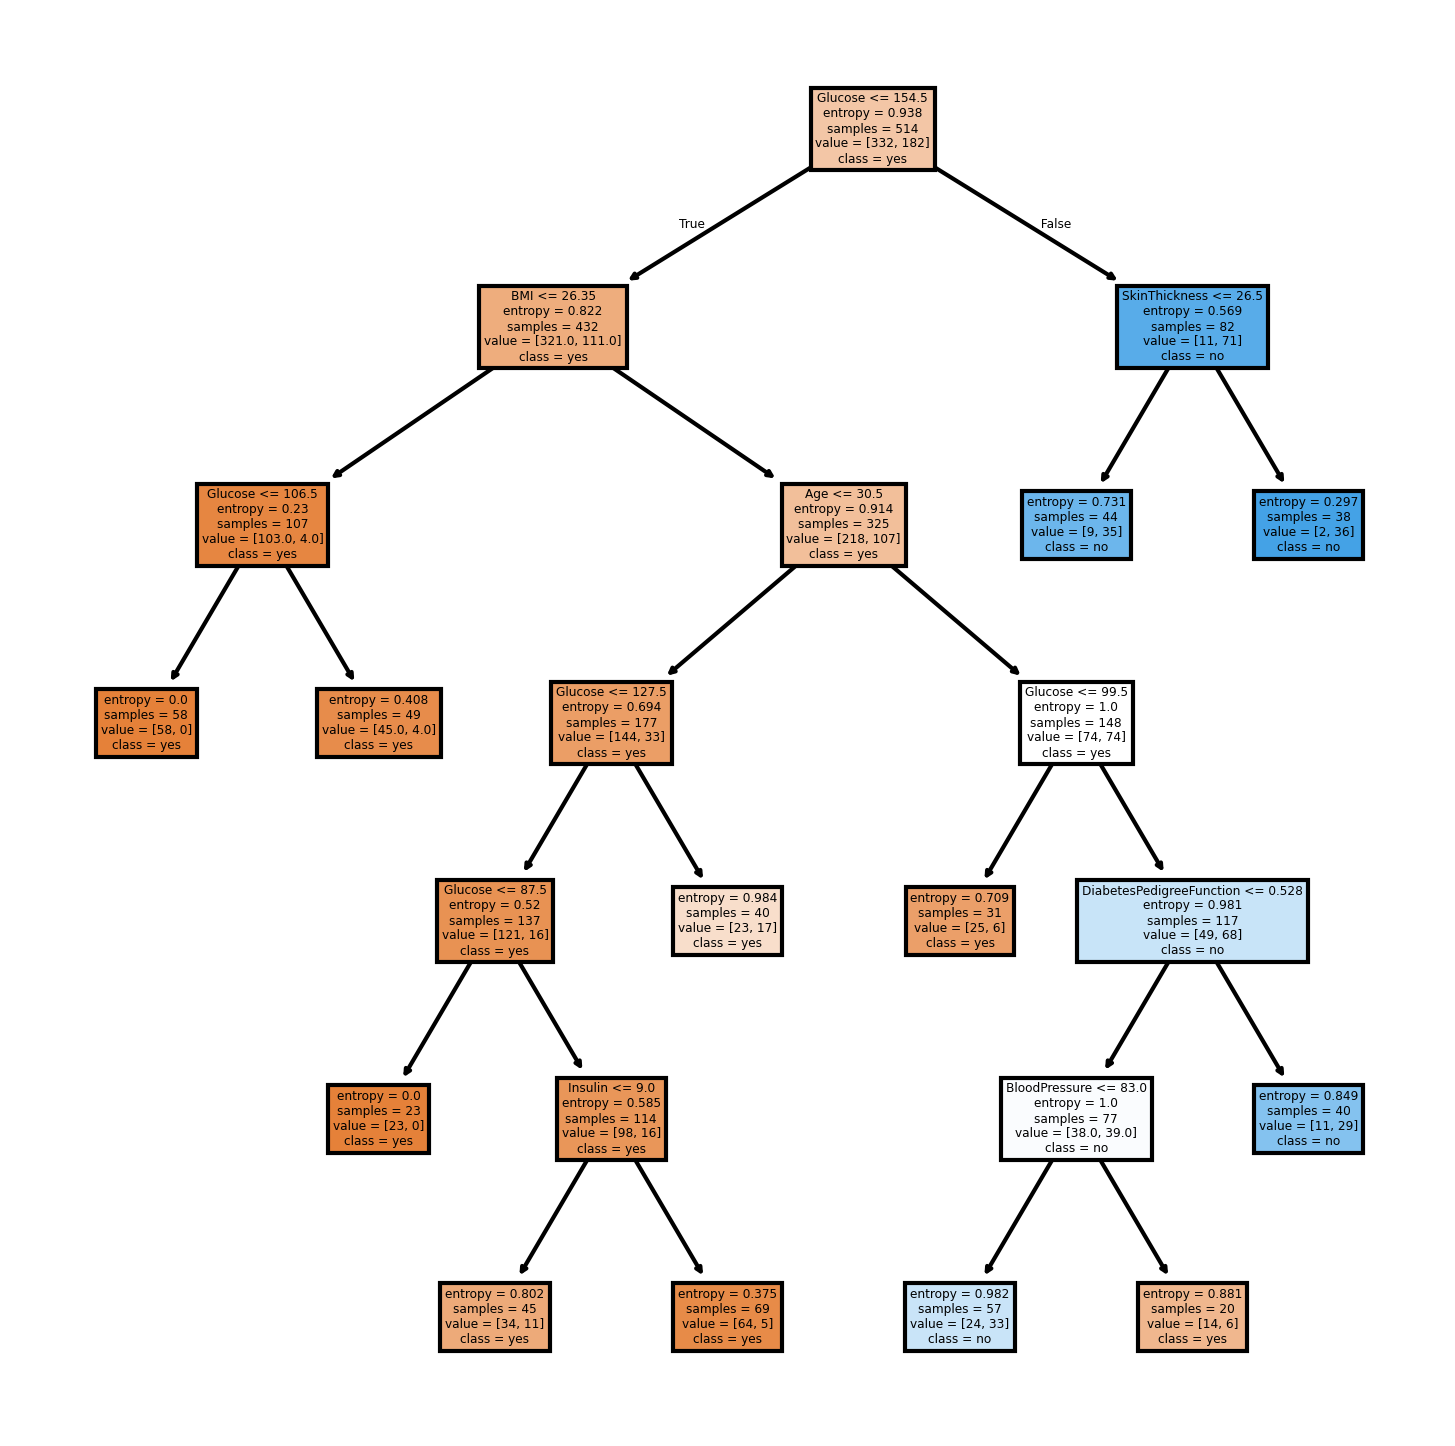

In [28]:
from sklearn.tree import plot_tree

fn=x_train.columns

cn=["yes","no"] 

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)

plot_tree(drt2,
          feature_names = fn, 
           class_names=cn,
           filled = True);

In [29]:
#gini has beter testing scores
pred_train = drt1.predict(x_train)
pred_test = drt1.predict(x_test)

#entropy so we can compare
pred_train2 = drt2.predict(x_train)
pred_test2 = drt2.predict(x_test)

In [30]:
#Model Evaluation gini
from sklearn import metrics
CMTrain = pd.DataFrame(metrics.confusion_matrix(y_train, pred_train), columns = ['Pred 0', 'Pred 1'],
                      index = ['Act 0', 'Act 1'])
CMTrain


,Pred 0,Pred 1
Act 0,285,47
Act 1,47,135


In [31]:
#Model Evaluation for entropy
from sklearn import metrics
CMTrain2 = pd.DataFrame(metrics.confusion_matrix(y_train, pred_train2), columns = ['Pred 0', 'Pred 1'],
                      index = ['Act 0', 'Act 1'])
CMTrain2

,Pred 0,Pred 1
Act 0,286,46
Act 1,49,133


In [32]:
print(metrics.classification_report(y_train, pred_train))
print(metrics.classification_report(y_train, pred_train2))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       332
           1       0.74      0.74      0.74       182

    accuracy                           0.82       514
   macro avg       0.80      0.80      0.80       514
weighted avg       0.82      0.82      0.82       514

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       332
           1       0.74      0.73      0.74       182

    accuracy                           0.82       514
   macro avg       0.80      0.80      0.80       514
weighted avg       0.81      0.82      0.81       514



In [33]:
CMTest = pd.DataFrame(metrics.confusion_matrix(y_test, pred_test), columns = ['Pred 0', 'Pred 1'],
                      index = ['Act 0', 'Act 1'])
CMTest

,Pred 0,Pred 1
Act 0,129,39
Act 1,31,55


In [34]:
CMTest2 = pd.DataFrame(metrics.confusion_matrix(y_test, pred_test2), columns = ['Pred 0', 'Pred 1'],
                      index = ['Act 0', 'Act 1'])
CMTest2

,Pred 0,Pred 1
Act 0,131,37
Act 1,32,54


In [35]:
print(metrics.classification_report(y_test, pred_test))
print(metrics.classification_report(y_test, pred_test2))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       168
           1       0.59      0.64      0.61        86

    accuracy                           0.72       254
   macro avg       0.70      0.70      0.70       254
weighted avg       0.73      0.72      0.73       254

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       168
           1       0.59      0.63      0.61        86

    accuracy                           0.73       254
   macro avg       0.70      0.70      0.70       254
weighted avg       0.73      0.73      0.73       254



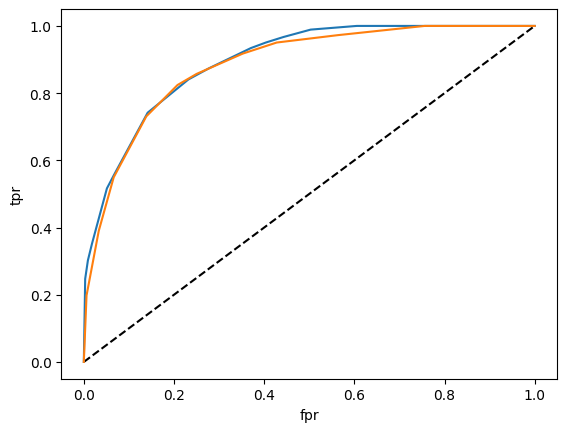

In [36]:
probs=drt1.predict_proba(x_train)[:,1]
probs2=drt2.predict_proba(x_train)[:,1]
fpr, tpr, threshold=metrics.roc_curve(y_train,probs )
fpr2, tpr2, threshold2=metrics.roc_curve(y_train,probs2 )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label="Gini")
plt.plot(fpr2,tpr2, label='Entropy')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [37]:
print(f'AUC score for gini is: {metrics.roc_auc_score(y_train,probs)}')
print(f'AUC score for entropy is: {metrics.roc_auc_score(y_train,probs2)}')

AUC score for gini is: 0.8949755064212895
AUC score for entropy is: 0.8853518469482324


In [38]:
def evaluate(y,predY):
    cm= metrics.confusion_matrix(y,predY)
    accuracy= (cm[0,0]+cm[1,1])/cm.sum()
    recall_1= (cm[1,1])/(cm[1,1]+cm[1,0])
    fg= pd.DataFrame({"Accuracy":pd.Series(accuracy),
                 "Recall_1":pd.Series(recall_1)})
    return fg

In [39]:
print(evaluate(y_train, pred_train))
print(evaluate(y_train, pred_train2))

   Accuracy  Recall_1
0  0.817121  0.741758
   Accuracy  Recall_1
0  0.815175  0.730769


In [40]:
print(evaluate(y_test, pred_test))
print(evaluate(y_test, pred_test2))

   Accuracy  Recall_1
0  0.724409  0.639535
   Accuracy  Recall_1
0  0.728346  0.627907


In [42]:
drt1.feature_importances_

array([0.        , 0.614833  , 0.028114  , 0.00882258, 0.02570968,
       0.14111405, 0.02714315, 0.15426354])

In [41]:
df= pd.DataFrame({"Var":x_train.columns, "Imp":drt1.feature_importances_}).sort_values(by=["Imp"], ascending=False)
df

,Var,Imp
1,Glucose,0.614833
7,Age,0.154264
5,BMI,0.141114
2,BloodPressure,0.028114
6,DiabetesPedigreeFunction,0.027143
4,Insulin,0.025710
3,SkinThickness,0.008823
0,Pregnancies,0.000000


In [43]:
df2= pd.DataFrame({"Var":x_train.columns, "Imp":drt2.feature_importances_}).sort_values(by=["Imp"], ascending=False)
df2

,Var,Imp
1,Glucose,0.601378
5,BMI,0.178112
7,Age,0.139949
4,Insulin,0.025170
6,DiabetesPedigreeFunction,0.020419
2,BloodPressure,0.018087
3,SkinThickness,0.016885
0,Pregnancies,0.000000


In [44]:
imp= df[df["Imp"]>=0.15]
print(imp['Var'].values)

imp2= df2[df2["Imp"]>=0.15]
print(imp2['Var'].values)

['Glucose' 'Age']
['Glucose' 'BMI']


In [45]:
imp_feat = ['Glucose', 'Age']
xx1= x_train[imp_feat]
xx2= x_test[imp_feat]


imp_feat2 = ['Glucose', 'BMI']
xx1_2= x_train[imp_feat2]
xx2_2= x_test[imp_feat2] 

In [46]:
drt1_s = DecisionTreeClassifier(criterion= 'gini', max_depth= 6, min_samples_leaf= 10, min_samples_split= 50)

drt1_s.fit(xx1, y_train)

print(f'Training score : {drt1_s.score(xx1, y_train)}')
print(f'Testing score : {drt1_s.score(xx2, y_test)}')

drt2_s = DecisionTreeClassifier(criterion= 'entropy', max_depth= 6, min_samples_leaf= 20, min_samples_split= 50)

drt2_s.fit(xx1_2, y_train)

print(f'Training score : {drt2_s.score(xx1_2, y_train)}')
print(f'Testing score : {drt2_s.score(xx2_2, y_test)}')

Training score : 0.7898832684824902
Testing score : 0.7480314960629921
Training score : 0.7898832684824902
Testing score : 0.7480314960629921


In [47]:
models_report=pd.DataFrame()

tmp1 = pd.Series({'Model': " Decision Tree gini",
                 'ROC Score' : metrics.roc_auc_score(y_test, pred_test),
                 'Precision Score': metrics.precision_score(y_test, pred_test),
                 'Recall Score': metrics.recall_score(y_test, pred_test),
                 'Accuracy Score': metrics.accuracy_score(y_test, pred_test)})

tmp2 = pd.Series({'Model': " Decision Tree entropy",
                 'ROC Score' : metrics.roc_auc_score(y_test, pred_test2),
                 'Precision Score': metrics.precision_score(y_test, pred_test2),
                 'Recall Score': metrics.recall_score(y_test, pred_test2),
                 'Accuracy Score': metrics.accuracy_score(y_test, pred_test2)})

model_dt_report = models_report._append([tmp1, tmp2], ignore_index = True)
model_dt_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score
0,Decision Tree gini,0.703696,0.585106,0.639535,0.724409
1,Decision Tree entropy,0.703834,0.593407,0.627907,0.728346
